# MultiLayer Neural Network

A neural network is put together by hooking together many of our simple "neurons", so that the output of a neuron can be the input of another

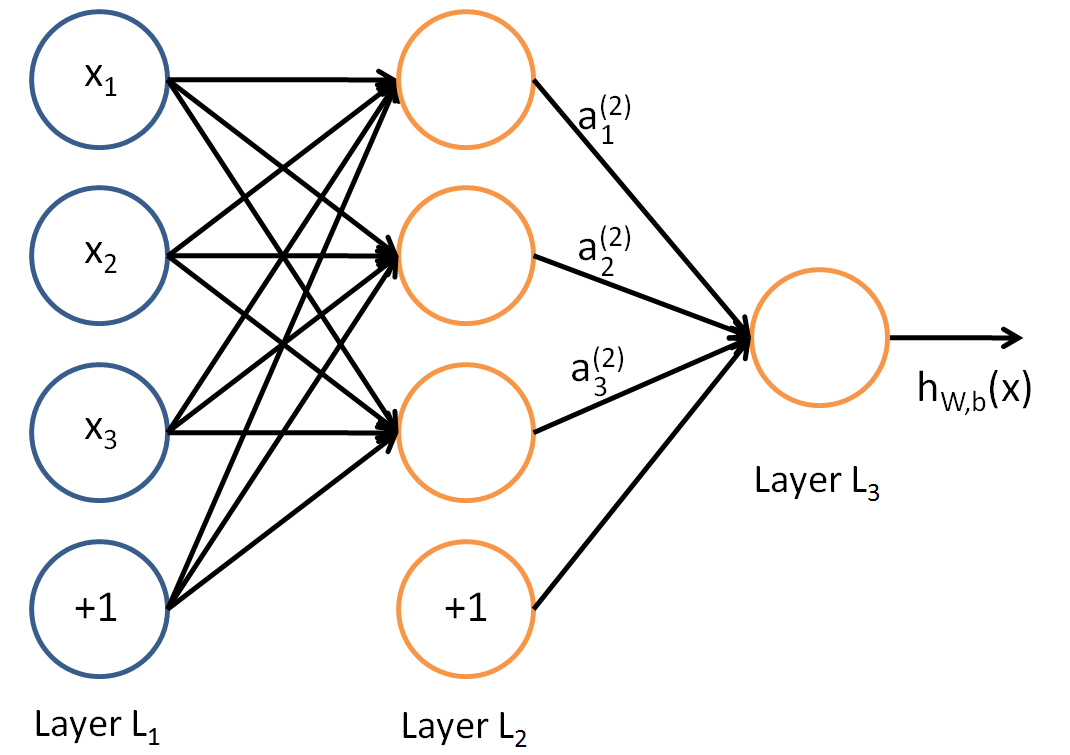

## Items
1. ** Input layer ** - the leftmost layer of the network
2. ** Output layer ** - the rightmost layer
3. ** Hidden layer ** - the middle layers of nodes
4. ** Bias layer ** - the circle labeled "+1"

So that our example neural network has 3 ** input units ** (not counting the bias unit), 3 ** hidden units **, and 1 ** output unit **.

- $\mathbf{n_1}$ denote the number of layers in the network. ($n_l = 3$).
- Layer $l$ labeled as $L_l$, so layer $L_1$ is the input layer, and layer $L_\mathbf{n_l}$ is the output layer.
- Neural network has parameters $(W,b) = (W^1,b^1,W^2,b^2)$,  
where we write $W_\mathbf{ij}^l$ to denote the parameter (of weight) associated with the connection between unit $j$ in layer $l$, and unit $i$ in layer $l+1$.
- Also, $b_i^l$ is the bias associated with unit $i$ in layer $l+1$. Thus, in our example, we have $|W^1| = (3,3)$ and $|W^2| = (1,3)$

** Note** that bias units don't have inputs or connections going into them, since they always output the value +1. 
-  We also let $s_l$ denote the number of nodes in layer $l$ (not counting the bias unit)

- $a_i^l$ is denoted as ** activation ** (meaning output value) of unit $i$ in layer $l$. For $l=1$, we also use $a_i^1 = x_i$, to denote $i-th$ input.

Given a fixed setting of the parameters $W$, $b$, our neural network defines a hypothesis $h_\mathbf{W,b}(x)$ that outputs a real number.  
Specifically, the computation that this neural network represents is given by:

\begin{align}
a_1^{(2)} &= f(W_{11}^{(1)}x_1 + W_{12}^{(1)} x_2 + W_{13}^{(1)} x_3 + b_1^{(1)})  \\
a_2^{(2)} &= f(W_{21}^{(1)}x_1 + W_{22}^{(1)} x_2 + W_{23}^{(1)} x_3 + b_2^{(1)})  \\
a_3^{(2)} &= f(W_{31}^{(1)}x_1 + W_{32}^{(1)} x_2 + W_{33}^{(1)} x_3 + b_3^{(1)})  \\
h_{W,b}(x) &= a_1^{(3)} =  f(W_{11}^{(2)}a_1^{(2)} + W_{12}^{(2)} a_2^{(2)} + W_{13}^{(2)} a_3^{(2)} + b_1^{(2)}) 
\end{align}

In the sequel, we also let $z_i^l$ denote the total weighted sum of inputs to unit $i$ in layer $l$, including the bias term (e.g., $\textstyle z_i^{(2)} = \sum_{j=1}^n W^{(1)}_{ij} x_j + b^{(1)}_i $), so that $a^{(l)}_i = f(z^{(l)}_i)$.

Note that this easily lends itself to a more compact notation.  
Specifically, if we extend the activation function $f(.)$ to apply to vectors in an element-wise fashion(i.e., $f([z_1, z_2, z_3]) = [f(z_1), f(z_2), f(z_3)]$, then we can write the equations above more compactly as:

$$\begin{align}
z^{(2)} &= W^{(1)} x + b^{(1)} \\
a^{(2)} &= f(z^{(2)}) \\
z^{(3)} &= W^{(2)} a^{(2)} + b^{(2)} \\
h_{W,b}(x) &= a^{(3)} = f(z^{(3)})
\end{align}$$

We call this step ** forward propagation **. More generally, recalling that we also use $a^1 = x$ to also denote the values from the input layer, then given layer $l$'s activations $a^l$, we can compute layer $l+1$'s activations $a^\mathbf{l+1}$ as:

$$
\begin{align}
z^{(l+1)} &= W^{(l)} a^{(l)} + b^{(l)}   \\
a^{(l+1)} &= f(z^{(l+1)})
\end{align}
$$

By organizing our parameters in matrices and using matrix-vector operations, we can take advantage of fast linear algebra routines to quickly perform calculations in our network.  

We have so far focused on one example neural network, but one can also build neural networks with other ** architectures** (meaning patterns of connectivity between neurons), including ones with multiple hidden layers. the most common choice is a $n_l$-layered network where layer 1 is the input layer, layer $n_l$ is the output layer, and each layer $l$ is densely connected to layer $l+1$. In this settings, to compute the output of the network, we can successively compute all the activations in layer $L_2$, then layer $L_3$, and so on, up to layer $L_\mathbf{n_l}$, using the equations above that describe the forward propagation step. This is one example of a ** feedforward ** neural network, since the connectivity graph does not have any directed loops of cycles.

Neural netwroks can also have multiple output units. for example, here is a network  with two hidden layers $L_2$ and $L_3$ and two output units in layer $L_4$:

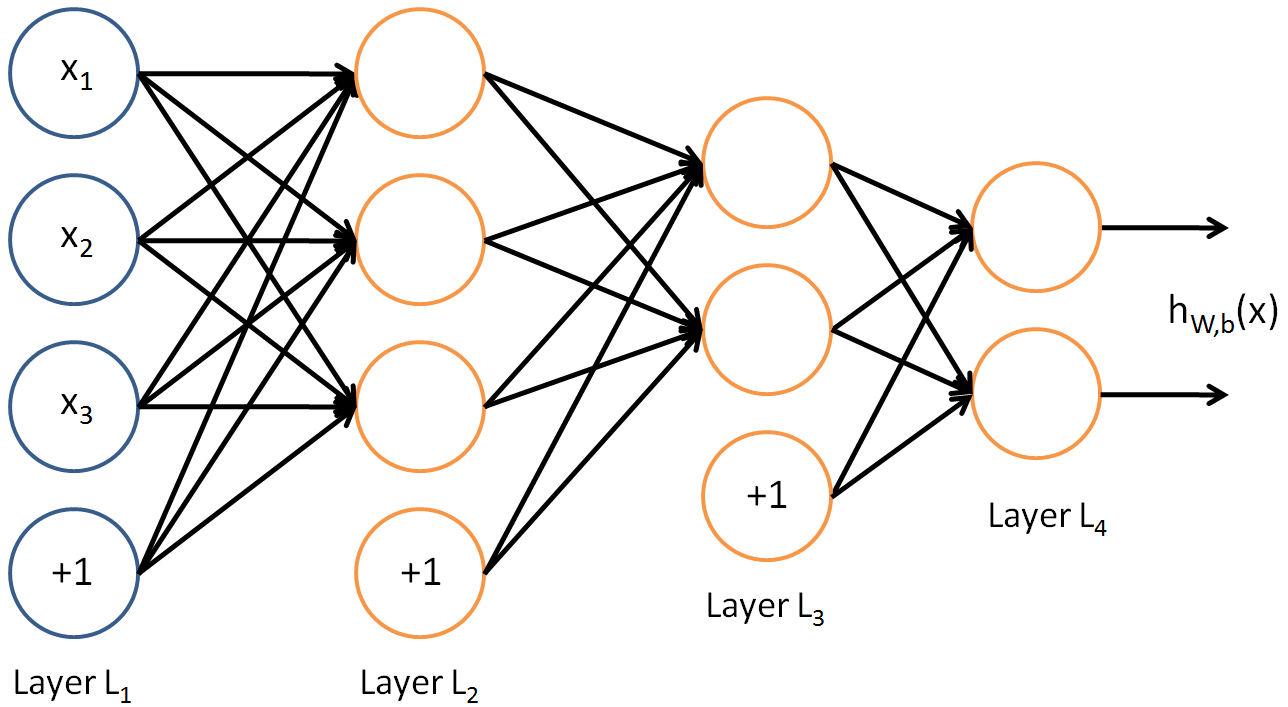

## Backpropagation Algorithm

## Simple MultiLayer Network

In [46]:
import numpy as np

class Network:
    
    def __init(self,sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y,1) for y in sizes[1:]]
        self.weights = [np.random.randn(y,x) for x,y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self,a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w,a)+b)
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size, eta, 
            test_data=None):
        
        training_data = list(training_data)
        n = len(training_data)
        
        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)
            
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0,n,mini_batch_size)
            ]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            
            if test_data:
                print("Epoch {}: {} /{}".format(j, self.evaluate(test_data)))
            else:
                print("Epoch {} complete".format(j))
                
    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x,y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        
        self.weights = [w - (eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        
        self.biases = [b - (eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]
        
    def bachprop(self, x ,y):
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        #feedforward
        activation = x 
        activations = [x] #list to store all the activations, layer by layer 
        zs = []
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b 
            zs.append(z)
            
            activation = sigmoid(z)
            activations.append(activation)
            
        #backward pass
        
        #last layer,output layer
        delta = self.cost_derivative(activations[-1],y)*sigmoid_prime(zs[-1])
        
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta,activations[-2].transpose())
        
        # start from n-1 layer down to 1
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_n[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
        
        
    def evaluate(self, test_data):
        
        # Find maximum result
        test_results = [(np.argmax(self.feedforward(x)),y)
                       for (x,y) in test_data]
        # Returns count of how many predictions are the same as test output
        return sum(int(x ==y) for (x,y) in test_results)
        
    def cost_derivative(self, output_activations, y):
        return output_activations - y
    
def sigmoid(x):
    return 1/(1+np.ext(-x))

def sigmoid_prime(x):
    return sigmoid(x)(1 - sigmoid(x))

## MLN with Keras

In [17]:
# https://towardsdatascience.com/how-to-build-a-neural-network-with-keras-e8faa33d0ae4


### Import all requered libraries

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

#import imdb database and split it in 50/50 part for training and bverification
from keras.datasets import imdb

(training_data, training_targets), (testing_data,testing_targets) = imdb.load_data(num_words=10000)

data = np.concatenate((training_data, testing_data),axis = 0)
targets = np.concatenate((training_targets, testing_targets), axis = 0)

### Data observation

In [19]:
print("Categories:", np.unique(targets))
print("Numbers of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Numbers of unique words: 9998


In [20]:
lenght = [len(i) for i in data]

print("Average Review length:", np.mean(lenght))
print("Standard Deviation:", round(np.std(lenght)))

Average Review length: 234.75892
Standard Deviation: 173.0


In [21]:
print("Label:", targets[0])
print(data[0])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [22]:
# Now show the review
# Words are stored into index
index = imdb.get_word_index()
reverse_index = dict((value,key) for key,value in index.items())
decoded = " ".join([reverse_index.get(i-3,"#") for i in data[0]])
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Data Preparation

We will vectorize every review and fill it with zeros so that it contains exactly 10,000 numbers. That means we fill every review that is shorter than 10,000 with zeros.

In [23]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

data = vectorize(data)
targets = np.array(targets).astype("float32")

In [24]:
data.shape

(50000, 10000)

In [25]:
# Split our data into a training and a testi set

test_x = data[:10000]
test_y = targets[:10000]

train_x = data[10000:]
train_y = data[10000:]

### Building and Training the Model

There are two types of models available in Keras:
- Sequential model (https://keras.io/models/sequential/)
- Model class used with function API

Then we simple add the input-, hidden- and output-layers. Between them, we are using dropout to prevent overfitting. Note that you should always use a dropout rate between 20% and 50%.

At every layer, we use "Dense" which means that the units are fully connected. Within the hidden-layers, we use the relu function, because this is always a good start and yields a satisfactory result most of the time. Feel free to experiment with other activation functions.  
And at the output-level, we use the sigmoid function, which maps the values between 0 and 1. Note that we set the input-shape to 10,000 at the input-layer, because our reviews are 10,000 integers long. The input-layer takes 10,000 as input and outputs it with a shape of 50.

In [33]:
model = models.Sequential()

# Input-layer

model.add(layers.Dense(50, activation='relu', input_shape=(10000,)))

#Hidden-layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50,activation="relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation="relu"))

#Output-layer
model.add(layers.Dense(1,activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                500050    
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
_________________________________________________________________


Now we need to compile our model, which is nothing but configuring the model for training, We use the "adam" optimizer. The optimizer is the algorithm that changes the weights and biases during training. We also choose binary-crossentropy as loss (because we deal with binary classification) and accuracy as our evaluation metric.

In [27]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["accuracy"]
)

We are now able to train our model.  
We do this with a batch_size of 500 and only for two epochs, because it was recognized that the model overfits if we train it longer.

The Batch size defines the number of samples that will be propagated through the network and an epoch is an iteration over the entire training data.  
*In general* a larget batch-size results in faster training, but don't always converges fast.  
A smaller batch-size is slower in training, but it * can* converge faster. This is definitely problem dependent and you need to try out a few diffirent values.

**Standard size** of batch-size is 32.

In [36]:
results = model.fit(
    train_x, train_y,
    epochs=2,
    batch_size=500,
    validation_data = (test_x, test_y)
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 4s 94us/step - loss: 0.1522 - acc: 0.9449 - val_loss: 0.2945 - val_acc: 0.8883
Epoch 2/2
40000/40000 [==============================] - 4s 95us/step - loss: 0.1046 - acc: 0.9636 - val_loss: 0.3290 - val_acc: 0.8876


In [40]:
np.mean(results.history['val_acc'])

0.8879499986767769

In [35]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb

(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)

data = np.concatenate((training_data, testing_data), axis=0)

targets = np.concatenate((training_targets, testing_targets), axis=0)

def vectorize(sequences, dimension = 10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1
 return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")

test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
# compiling the model
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
results = model.fit(
 train_x, train_y,
 epochs= 2,
 batch_size = 500,
 validation_data = (test_x, test_y)
)
print("Test-Accuracy:", np.mean(results.history["val_acc"]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 50)                500050    
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
_________________________________________________________________
Trai